In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
# import
sc = pd.read_csv('SuperCam_pred_true_summary.csv').reset_index() # the index will be the sample label
sc['inst'] = 'SuperCam'
cc = pd.read_csv('ChemCam_pred_true_summary.csv').reset_index()
cc['inst'] = 'ChemCam'
cc.rename(columns={'Target':'target'}, inplace=True) # match to SC

# not exactly the same elements analyzed
cc_comps = [x.split('_')[0] for x in cc.columns if 'actual' in x]
sc_comps = [x.split('_')[0] for x in sc.columns if 'actual' in x]

print(cc_comps)
print(sc_comps)
print(set(cc_comps) - set(sc_comps))

comps = list(cc_comps)

# merge
df = pd.concat([sc,cc], ignore_index=True)

['Al2O3', 'CaO', 'FeOT', 'K2O', 'MgO', 'MnO', 'Na2O', 'SiO2', 'TiO2']
['Al2O3', 'CaO', 'FeOT', 'K2O', 'MgO', 'Na2O', 'SiO2', 'TiO2']
{'MnO'}


In [76]:
sc

,index,target,n_dups,Al2O3_actual,Al2O3_mean,Al2O3_std,CaO_actual,CaO_mean,CaO_std,FeOT_actual,...,Na2O_actual,Na2O_mean,Na2O_std,SiO2_actual,SiO2_mean,SiO2_std,TiO2_actual,TiO2_mean,TiO2_std,inst
0,0,scct lanke0101,9,0.44,0.974444,0.642770,27.59,28.497778,0.482850,10.14,...,0.03,0.493333,0.116940,8.03,5.148889,1.372921,0.00,0.000000,0.000000,SuperCam
1,1,scct lbhvo20406,8,12.98,16.142500,0.754752,10.96,9.846250,0.846437,11.39,...,2.53,2.723750,0.291054,49.90,45.335000,1.167965,2.84,1.420000,0.116986,SuperCam
2,2,scct lca530106,10,0.01,2.798000,0.681727,55.38,51.759000,0.587546,0.01,...,0.02,0.026000,0.071988,0.03,0.000000,0.000000,0.00,0.013000,0.004830,SuperCam
3,3,scct lcmb0006,10,0.12,0.653000,0.633860,0.05,0.138000,0.057310,9.02,...,0.02,0.024000,0.075895,95.90,73.803000,2.954966,0.00,0.058000,0.013984,SuperCam
4,4,scct ljmn10106,10,4.41,7.588000,0.622857,2.90,2.804000,0.117964,13.41,...,4.30,3.330000,0.333033,15.14,16.282000,1.850182,0.91,0.781000,0.037253,SuperCam
5,5,scct ljsc10304,8,20.83,20.631250,1.641989,5.65,4.667500,0.365738,16.15,...,3.00,3.721250,0.234487,43.70,43.696250,6.863343,3.05,1.540000,0.207158,SuperCam
6,6,scct lside0101,9,0.02,0.634444,0.574350,20.07,21.420000,1.387119,37.82,...,0.02,0.402222,0.098079,12.85,9.713333,1.367251,0.00,0.028889,0.010541,SuperCam
7,7,scct nte010301,10,9.90,10.681000,0.755240,13.84,10.995000,0.501891,17.25,...,1.32,2.544000,0.251493,47.67,45.272000,1.164176,0.51,0.502000,0.006325,SuperCam
8,8,scct nte020106,10,9.23,6.766000,0.675248,12.15,9.012000,0.182318,16.16,...,1.30,1.888000,0.096240,46.57,46.385000,1.288740,0.42,0.450000,0.026667,SuperCam
9,9,scct nte030106,9,9.68,10.135556,1.103031,12.67,10.831111,0.200901,17.24,...,1.26,2.586667,0.156205,47.75,46.395556,1.847377,0.44,0.486667,0.022913,SuperCam


### Histogram comparing standard compositions

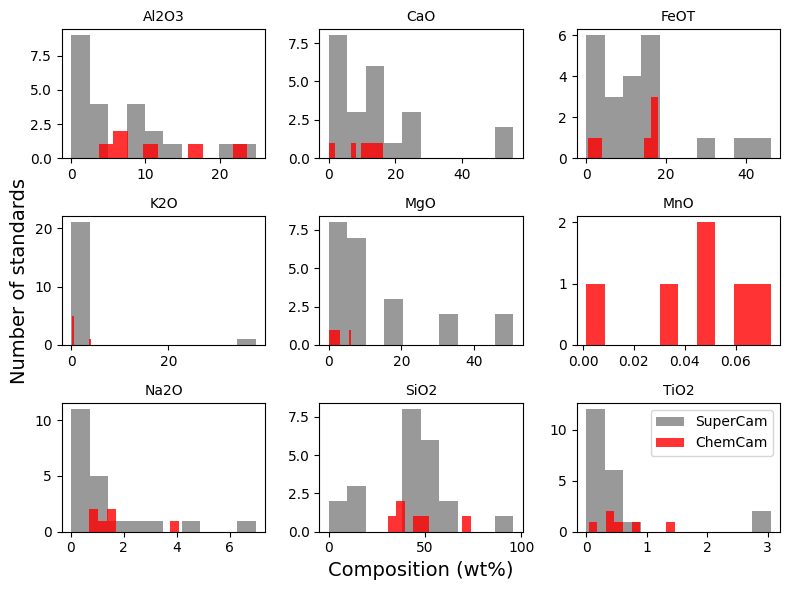

In [45]:
xs=[0,0,0,1,1,1,2,2,2]
ys=[0,1,2,0,1,2,0,1,2]

f1 = 14
f2=10

fig, ax = plt.subplots(3,3,figsize=(8,6))

i=0
for oxide in comps:
    col = f'{oxide}_actual'

    # SuperCam
    if oxide != 'MnO':
        ax[xs[i],ys[i]].hist(sc[col].dropna(), alpha=0.8, color='grey', label='SuperCam')
    
    # ChemCam
    ax[xs[i],ys[i]].hist(cc[col].dropna(), alpha=0.8, color='red', label='ChemCam')
    
    ax[xs[i],ys[i]].set_title(oxide, fontsize=f2)
    
    i+=1
    
ax[1,0].set_ylabel('Number of standards', fontsize=f1)
ax[2,1].set_xlabel('Composition (wt%)', fontsize=f1)

plt.legend()
plt.tight_layout()
plt.show()

### Predicted vs. True overall for SC and CC
3x3 figure

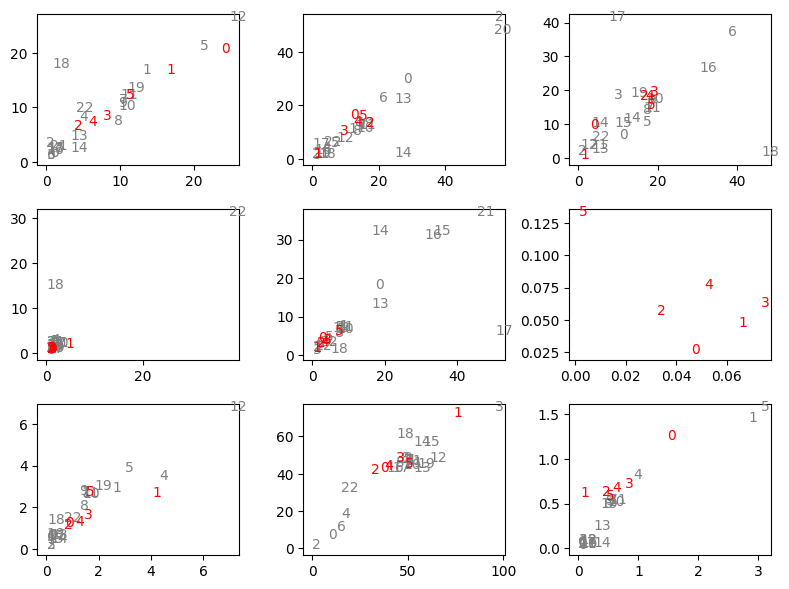

In [75]:
xs=[0,0,0,1,1,1,2,2,2]
ys=[0,1,2,0,1,2,0,1,2]

f1 = 14
f2=10

fig, ax = plt.subplots(3,3,figsize=(8,6))

i=0

for oxide in comps:
    pred = f'{oxide}_mean'
    std = f'{oxide}_std'
    true = f'{oxide}_actual'
    
    temp = df[df[pred].notna()].copy()
    
    for row in temp.index:
        c = 'red' if temp.loc[row]['inst'] == 'ChemCam' else 'grey'
        label = temp.loc[row]['index']
        x = temp.loc[row][true]
        y = temp.loc[row][pred]
        
        ax[xs[i],ys[i]].annotate(label, (x,y), color=c)
        
    ax[xs[i],ys[i]].scatter(temp[true], temp[pred], marker='')
    
    i+=1
    
plt.tight_layout()
plt.show()

In [70]:
temp.loc[row]

index                     0
target          Kga-d_Med-S
n_dups                   24
Al2O3_actual          23.71
Al2O3_mean        19.958333
Al2O3_std          0.940821
CaO_actual            11.46
CaO_mean          15.195833
CaO_std            1.320895
FeOT_actual          2.8302
FeOT_mean          8.729167
FeOT_std           2.044819
K2O_actual             0.26
K2O_mean           0.225417
K2O_std            0.039118
MgO_actual             1.68
MgO_mean           3.441667
MgO_std            0.507266
Na2O_actual            0.72
Na2O_mean           1.07625
Na2O_std           0.097348
SiO2_actual           35.64
SiO2_mean         41.070833
SiO2_std           1.427214
TiO2_actual            1.47
TiO2_mean           1.21875
TiO2_std           0.138134
inst                ChemCam
MnO_actual         0.045965
MnO_mean           0.024167
MnO_std            0.015012
Name: 23, dtype: object